In [4]:
import pandas as pd


In [5]:
data = pd.read_csv("DATA/Robust_scaler_result.csv",encoding="cp949")

In [6]:
data.columns

Index(['CUSTNO', 'GNO', 'CBSCORE', 'CBSCOREGRD', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'ASSETAMT', 'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'GKIND', 'BIZNML_x', 'LABORCNT', 'ACTCD', 'ACTKND',
       'KOSPI', '환율', 'GDP', '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수', 'ONEHOT'],
      dtype='object')

In [5]:
features = data[[ 'CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'IMSAAMT', 'IMJUAMT',  'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'KOSPI', '환율', 'GDP', 
       '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수','ONEHOT']] 
act = data['ACTCD'] 

In [6]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split

In [7]:

train_x, test_x,train_y, test_y = train_test_split(features, act,
stratify=act,train_size=0.7,test_size=0.3,random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(27381, 19) (11736, 19) (27381,) (11736,)


In [8]:
sm = BorderlineSMOTE(random_state=42)
over_train_x, over_train_y = sm.fit_resample(train_x,train_y)
'''
over_train_x : 학습용 독립변수
over_train_y : 학습용 종속변수
'''

'\nover_train_x : 학습용 독립변수\nover_train_y : 학습용 종속변수\n'

In [9]:
from sklearn.neighbors import KNeighborsClassifier

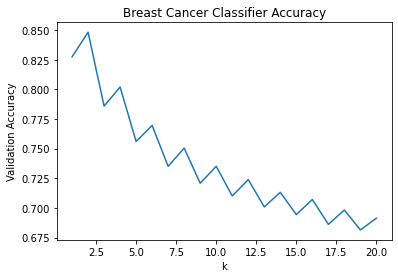

0.848159509202454


In [10]:
import matplotlib.pyplot as plt
k = range(1,21)
accuracies = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='ball_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    accuracies.append(KNC.score(test_x, test_y))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()    
print(max(accuracies))

In [11]:
print(max(accuracies))

0.848159509202454
